<a href="https://colab.research.google.com/github/2022504813pratham/Pratham_Mittal/blob/main/Titanic_Survival_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset 📅

In [ ]:
my_data = pd.read_csv('tested.csv')
my_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
my_data.info()
print(my_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Data Cleaning and Preprocessing👀

In [ ]:
# Dropping Unneccesary Columns
my_data.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
my_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [ ]:
my_data['Age'].fillna(my_data['Age'].median(), inplace=True)


In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
# Encoding my categorical variables (One-HOT Encoding)
data = pd.get_dummies(my_data, columns=['Sex', 'Embarked'])

In [ ]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,27.0,0,0,8.0500,0,1,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,1,0,0
415,0,3,38.5,0,0,7.2500,0,1,0,0,1
416,0,3,27.0,0,0,8.0500,0,1,0,0,1


# Performing Feature Engineering and Selection📐

### - to Ensure that all feature Contribute Equally to the Aanlysis

In [ ]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1,0
4,1,3,22.0,1,1,12.2875,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,27.0,0,0,8.0500,0,1,0,0,1,0
414,1,1,39.0,0,0,108.9000,1,0,1,0,0,0
415,0,3,38.5,0,0,7.2500,0,1,0,0,1,0
416,0,3,27.0,0,0,8.0500,0,1,0,0,1,0


In [ ]:
features = ['Pclass', 'Age', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188,0.363636,0.636364,0.244019,0.110048,0.645933,0.839713
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.907576,0.481622,0.481622,0.430019,0.313324,0.478803,1.519072
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


# EXPLORATORY DATA ANALYSIS (EDA)📈📊

## 1. Univariate Analysis

0    266
1    152
Name: Survived, dtype: int64


C:\Users\91801\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


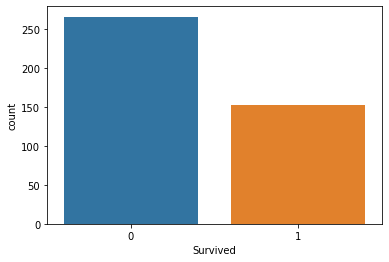

In [ ]:
# Count Plot - tells the freq. count of categorical value
sns.countplot(data['Survived'])
print(data['Survived'].value_counts())

In [ ]:
''' 0 - death, 1 - survive
from above graph it's clear that freq of death person is more'''


" 0 - death, 1 - survive \nfrom above graph it's clear that freq of death person is more"

C:\Users\91801\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

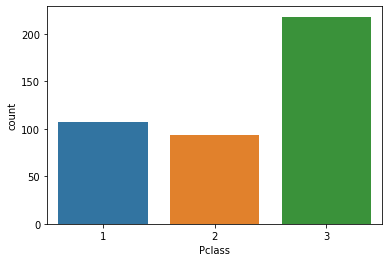

In [ ]:
sns.countplot(data['Pclass'])

C:\Users\91801\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

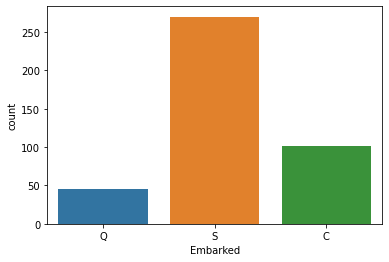

In [ ]:
sns.countplot(my_data['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

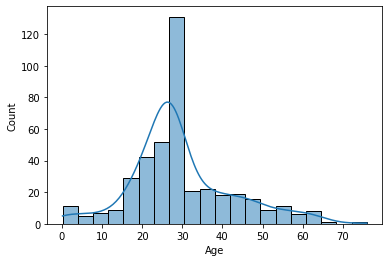

In [ ]:
# Understanding Age Distribution
sns.histplot(data=data, x='Age', bins=20, kde=True)

## 2. Bivariate Analysis

<AxesSubplot:xlabel='Pclass', ylabel='count'>

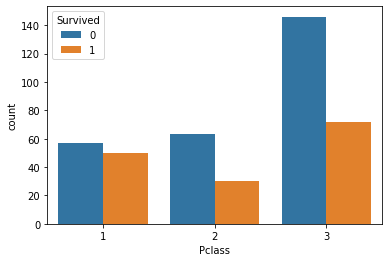

In [ ]:
# Pclass vs. Survival
sns.countplot(data=data, x='Pclass', hue='Survived')

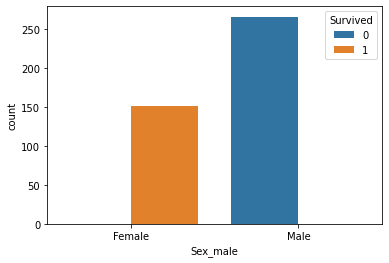

male      266
female    152
Name: Sex, dtype: int64


In [ ]:
sns.countplot(data=data, x='Sex_male', hue='Survived')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()
print(my_data['Sex'].value_counts())

In [ ]:
female_survied = (152/418)*100
female_survied

36.36363636363637

In [ ]:
male_survied = (266/418)*100
male_survied

63.63636363636363

<AxesSubplot:>

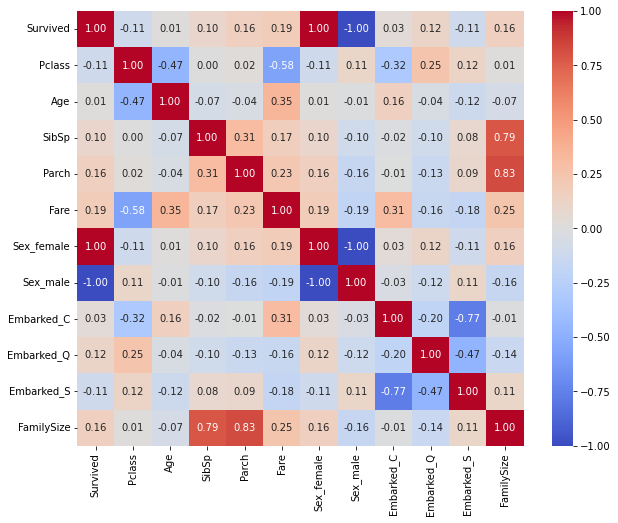

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Training the Model🧪

### -  Performing train_test_split to train my Model

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model = LogisticRegression(random_state=42, max_iter=500)

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
#pd.DataFrame(y_pred)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

# Model Evaluation ✅

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_squared_error

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print("\nClassification Report:")
print(classification_rep)


Accuracy: 1.000000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
m = model.coef_
m

array([[-0.92779171,  2.61126055, -0.03200353, -0.31760644, -0.12933111,
         0.00342248]])

In [ ]:
c = model.intercept_
c

array([1.6553383])